In [2]:
from model import Generator
import torch
gen = Generator(embed_size=6)
torch.manual_seed(7)
gen.load_state_dict(torch.load("cgan0620.pth",map_location=torch.device('cpu')))
gen.eval()

Generator(
  (f1): Linear(in_features=1, out_features=6, bias=True)
  (f1batchnorm): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=106, out_features=131072, bias=True)
  (batchnorm1d): BatchNorm1d(131072, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lrelu): LeakyReLU(negative_slope=0.2)
  (cnnt1): Sequential(
    (0): ConvTranspose3d(256, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
    (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (cnnt2): Sequential(
    (0): ConvTranspose3d(128, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (cnnt3): Sequential(
    (0): ConvTranspose3d(64, 32, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
    (1): B

#### An example of GAN inference

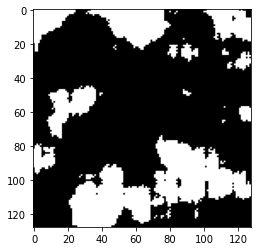

In [3]:
from matplotlib import pyplot as plt

def img_prc(img):
    img = img.detach().cpu()
    img = img.numpy()
    return img>0.5

torch.manual_seed(7)
img_num = 4
z = torch.randn(img_num,100)
f = torch.ones(img_num,1)*0.2
input_gen = (z,f)

img_fake = gen(z,f)
img_fake = img_prc(img_fake)
plt.imshow(img_fake[0,0,0,::],cmap='gray')


#### tracking GAN inference time for each generation process

In [4]:
import numpy as np
import datetime
img_num = 5

for phi in range(10,50,5):
    start = datetime.datetime.now()
    z = torch.randn(img_num,100)
    f = torch.ones(img_num,1)*(phi/100)
    img_fake = gen(z,f)
    end = datetime.datetime.now()
    time_interval = (end - start).microseconds
    print(f'GAN inference at current epoch is {time_interval/1000} millisecond')
    


GAN inference at current epoch is 875.369 millisecond
GAN inference at current epoch is 940.02 millisecond
GAN inference at current epoch is 759.636 millisecond
GAN inference at current epoch is 891.893 millisecond
GAN inference at current epoch is 778.379 millisecond
GAN inference at current epoch is 779.181 millisecond
GAN inference at current epoch is 758.778 millisecond
GAN inference at current epoch is 807.169 millisecond
